<a href="https://colab.research.google.com/github/AndyJihang/Building-Code-Agents-with-Hugging-Face-smolagents/blob/main/Introduction_to_Code_Agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

The limitation of traditional ReAct (Reason + Act) agents:

- Model "Reason" -> output text for the next action
- Use a tool function (Act)
- Obtain preliminary results (Observation)
- Model re-Reason and decide the next step

Problems:
- Multiple rounds of inter-reactions. Too complicate.
- Every step is easy to go wrong. Need a great number of prompt engineers to control the format.
- Many times model just need a small snippet of code and one execution.

# What's Code Agent?

Code Agent = Model generate executable code one-time and run it directly.
- Efficient
- Flexible
- Human-friendly

# Advantages of `smolagents`
`smolagents` is a framework of Hugging Face, whcih treat Code Agent as the "first-class citizen".
- Provide environment and capture erors.
- Restrict packages. Avoid dangerous functions.
- Output, log management, easier for testing.

# A Small Example

In [40]:
!pip -q install -U "smolagents[openai]"

In [41]:
# --- Colab setup ---
from google.colab import userdata
import os

# Get Hugging Face API key from Colab Secrets
OPENAI_API_KEY = userdata.get("OPENAI_API_KEY")
if not OPENAI_API_KEY:
    raise ValueError("⚠️ Please set HF_API_KEY in Colab Secrets (left panel 🔑).")

In [45]:
# === 1) Import smolagents & choose model ===
from smolagents import CodeAgent, OpenAIServerModel
model = OpenAIServerModel(
    model_id="gpt-4o-mini",
    api_base="https://api.openai.com/v1",   # default; can omit
    api_key=OPENAI_API_KEY,
)

In [46]:
# === 2) Create Code Agent（
# CodeAgent will let LLM generate a complete Python code directly and execute
agent = CodeAgent(
    tools=[],
    model=model,
    additional_authorized_imports=[
        "pandas",
        "numpy", "numpy.random",
        "matplotlib", "matplotlib.pyplot",
        "math", "random", "statistics", "itertools",
    ]
)

In [47]:
# === 3) Task A：Write code for -> All prime numbers below 100 ===
prompt_primes = """
Write concise Python code that:
1) prints all prime numbers up to 100 (inclusive) on one line separated by spaces;
2) prints the count as 'count=<N>' on the next line;
3) correctly handles the special case n=2 (2 is prime).
Only output executable Python, no explanations.
"""

print("\n" + "="*20 + " Task A: primes up to 100 " + "="*20)
result_A = agent.run(prompt_primes, max_steps=1)
print("\n[Agent returned]\n", result_A)


==================== Task A: primes up to 100 ====================


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Write concise Python code that:                                                                                 │
│ 1) prints all prime numbers up to 100 (inclusive) on one line separated by spaces;                              │
│ 2) prints the count as 'count=<N>' on the next line;                                                            │
│ 3) correctly handles the special case n=2 (2 is prime).                                                         │
│ Only output executable Python, no explanations.                                                                 │
│                                                                                                                 │
╰─ OpenAIServerModel - gpt-4o-mini ───────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  def is_prime(num):                                                                                               
      if num < 2:                                                                                                  
          return False                                                                                             
      for i in range(2, int(num**0.5) + 1):                                                                        
          if num % i == 0:                                                                                         
              return False                                                                                         
      return True                                                                                                  
                                                                                                                   
  primes = [i for i in range(101) if is_prime(i)]                                                                  
  print(" ".join(map(str, primes)))                                                                                
  print(f"count={len(primes)}")                                                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97
count=25

Out: None

[Step 1: Duration 2.85 seconds| Input tokens: 1,967 | Output tokens: 94]

Reached max steps.

[Step 2: Duration 4.85 seconds| Input tokens: 2,463 | Output tokens: 186]


[Agent returned]
 ```python
def is_prime(num):
    if num < 2:
        return False
    for i in range(2, int(num**0.5) + 1):
        if num % i == 0:
            return False
    return True

primes = [i for i in range(101) if is_prime(i)]
print(" ".join(map(str, primes)))
print(f"count={len(primes)}")
```



==================== Task B: synthetic EDA ====================


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Write Python code that:                                                                                         │
│ 1) creates a pandas DataFrame with 400 rows and columns:                                                        │
│    - group: categorical in ['A','B','C','D'\] (balanced)                                                        │
│    - x: random float ~ N(0,1)                                                                                   │
│    - y: y = 2.5*x + epsilon, epsilon ~ N(0, 1.2) and group-specific mean shift: A:+0.5, B:+0.0, C:-0.3, D:+1.0  │
│ 2) computes group-wise mean of y and prints a neat table (group, mean_y)                                        │
│ 3) creates a matplotlib figure (single plot): bar chart of mean_y by group; set x/y labels and a title          │
│ 4) finally, print 'done' (exactly) on the last line.                                                            │
│ Only output executable Python, no explanations.                                                                 │
│                                                                                                                 │
╰─ OpenAIServerModel - gpt-4o-mini ───────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import pandas as pd                                                                                              
  import numpy as np                                                                                               
  import matplotlib.pyplot as plt                                                                                  
                                                                                                                   
  # Step 1: Create the DataFrame                                                                                   
  np.random.seed(0)                                                                                                
  n = 400                                                                                                          
  groups = np.random.choice(['A', 'B', 'C', 'D'], size=n, replace=True)                                            
  x = np.random.normal(0, 1, n)                                                                                    
  epsilon = np.random.normal(0, 1.2, n)                                                                            
                                                                                                                   
  mean_shifts = {'A': 0.5, 'B': 0.0, 'C': -0.3, 'D': 1.0}                                                          
  y = 2.5 * x + np.array([mean_shifts[group] for group in groups]) + epsilon                                       
                                                                                                                   
  df = pd.DataFrame({'group': groups, 'x': x, 'y': y})                                                             
                                                                                                                   
  # Step 2: Compute group-wise mean of y                                                                           
  mean_y = df.groupby('group')['y'].mean().reset_index(name='mean_y')                                              
  print(mean_y)                                                                                                    
                                                                                                                   
  # Step 3: Create a bar chart of mean_y by group                                                                  
  plt.figure(figsize=(8, 5))                                                                                       
  plt.bar(mean_y['group'], mean_y['mean_y'], color='skyblue')                                                      
  plt.xlabel('Group')                                                                                              
  plt.ylabel('Mean of y')                                                                                          
  plt.title('Group-wise Mean of y')                                                                                
  plt.xticks(rotation=45)                                                                                          
  plt.tight_layout([38;2;248;248;242

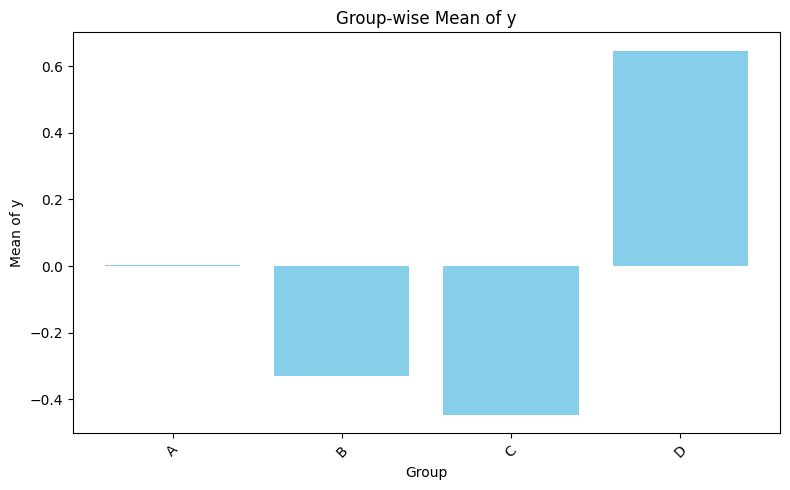

Execution logs:
  group    mean_y
0     A  0.002923
1     B -0.331669
2     C -0.447296
3     D  0.646912
done

Out: None

[Step 1: Duration 4.71 seconds| Input tokens: 2,077 | Output tokens: 300]

Reached max steps.

[Step 2: Duration 5.10 seconds| Input tokens: 3,215 | Output tokens: 598]


[Agent returned]
 ```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create the DataFrame
np.random.seed(0)
n = 400
groups = np.random.choice(['A', 'B', 'C', 'D'], size=n, replace=True)
x = np.random.normal(0, 1, n)
epsilon = np.random.normal(0, 1.2, n)

mean_shifts = {'A': 0.5, 'B': 0.0, 'C': -0.3, 'D': 1.0}
y = 2.5 * x + np.array([mean_shifts[group] for group in groups]) + epsilon

df = pd.DataFrame({'group': groups, 'x': x, 'y': y})

# Step 2: Compute group-wise mean of y
mean_y = df.groupby('group')['y'].mean().reset_index(name='mean_y')
print(mean_y)

# Step 3: Create a bar chart of mean_y by group
plt.figure(figsize=(8, 5))
plt.bar(mean_y['group'], mean_y['mean_y'], color='skyblue')
plt.xlabel('Group')
plt.ylabel('Mean of y')
plt.title('Group-wise Mean of y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Print 'done'
print('done')
```


In [50]:
# === 4) Task B：Write code to simulate data, do group analysis and plot figures ===
prompt_eda = """
Write Python code that:
1) creates a pandas DataFrame with 400 rows and columns:
   - group: categorical in ['A','B','C','D'] (balanced)
   - x: random float ~ N(0,1)
   - y: y = 2.5*x + epsilon, epsilon ~ N(0, 1.2) and group-specific mean shift: A:+0.5, B:+0.0, C:-0.3, D:+1.0
2) computes group-wise mean of y and prints a neat table (group, mean_y)
3) creates a matplotlib figure (single plot): bar chart of mean_y by group; set x/y labels and a title
4) finally, print 'done' (exactly) on the last line.
Only output executable Python, no explanations.
"""

print("\n" + "="*20 + " Task B: synthetic EDA " + "="*20)
result_B = agent.run(prompt_eda, max_steps=1)
print("\n[Agent returned]\n", result_B)